# Titanic Survival Analysis - Exploratory Data Analysis

**Project Goal:** Explore the Titanic dataset to understand what factors influenced passenger survival rates.

**Dataset:** The dataset contains information about 891 passengers on the Titanic, including demographics, ticket class, fare, and survival status.

**Questions I want to answer:**
1. What was the overall survival rate?
2. Did gender affect survival chances?
3. Did passenger class (1st, 2nd, 3rd) matter?
4. Did age play a role in survival?
5. Did families survive together?
6. Did ticket fare (price) affect survival?



In [2]:
# Importing libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


In [6]:
# Load the Titanic dataset
df = pd.read_csv('data/Titanic-Dataset.csv')

print('Dataset loaded successfully!')

print(f'\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns')


Dataset loaded successfully!

Dataset contains 891 rows and 12 columns


In [7]:
# Display first 5 rows
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Check column names and data types
print('Column Information:')
df.info()

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Understanding the Dataset

**Column Descriptions:**

- **PassengerId:** Unique ID for each passenger
- **Survived:** Survival status (0 = No, 1 = Yes) ← **TARGET VARIABLE**
- **Pclass:** Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Name:** Passenger's name
- **Sex:** Gender (male/female)
- **Age:** Age in years
- **SibSp:** Number of siblings/spouses aboard
- **Parch:** Number of parents/children aboard
- **Ticket:** Ticket number
- **Fare:** Ticket fare in pounds
- **Cabin:** Cabin number
- **Embarked:** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [9]:
# Statistical summary of numerical columns
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Check for missing values
print("Missing values in datatset:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count' : missing,
    'Percentage' : missing_percent
})

print(missing_df[missing_df['Missing_Count'] > 0])


Missing values in datatset:
          Missing_Count  Percentage
Age                 177   19.865320
Cabin               687   77.104377
Embarked              2    0.224467


## Observations

After loading and inspecting the data, here's what I noticed:

1. **Missing Data Issues:**
   - Age is missing for 20% of passengers - I'll need to handle this
   - Cabin is missing for 77% - might not be useful for analysis
   - Only 2 missing Embarked values - easy to fill
    

2. **Interesting Patterns I want to explore:**
   - Only 38% survived overall - what made some survive?
   - Most passengers were in 3rd class
   - Age ranges from 0.42 (baby) to 80 years old
     

3. **Next Steps:**
   - Clean the data (handle missing values)
   - Visualize survival rates by different factors
   - Find patterns and insights


# DATA CLEANING

In [17]:
# Lets handle missing Age values
# First, lets see the Age distribution 
print(f"Age - Mean: {df['Age'].mean():.1f}, Median: {df['Age'].median():.1f}")

# I will use median to fill missing ages (less affected by outliers)
df['Age'].fillna(df['Age'].median(), inplace = True)

print(f"Filled {177} missing Age values with median age ({df['Age'].median():.1f})")

              

Age - Mean: 29.7, Median: 28.0
Filled 177 missing Age values with median age (28.0)


In [18]:
# Fill missing Embarked with the most common port
most_common_port = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_port,inplace = True)
print(f"Filled 2 missing Embarked values with most common port: {most_common_port}")

Filled 2 missing Embarked values with most common port: S


In [19]:
# Cabin has too many existing values (77%) - dropping it
df.drop('Cabin', axis=1, inplace=True)
print("Dropped Cabin column due to excessive missing data")


Dropped Cabin column due to excessive missing data


In [20]:
# Verify no missing values remain
print("Missing values after cleaning:")
print(df.isnull().sum().sum())

print("\nData Cleaning complete!")
print(f"Final Dataset shape: {df.shape}")

Missing values after cleaning:
0

Data Cleaning complete!
Final Dataset shape: (891, 11)


# EXPLORATORY DATA ANALYSIS

now lets explore the data and answer our questions!

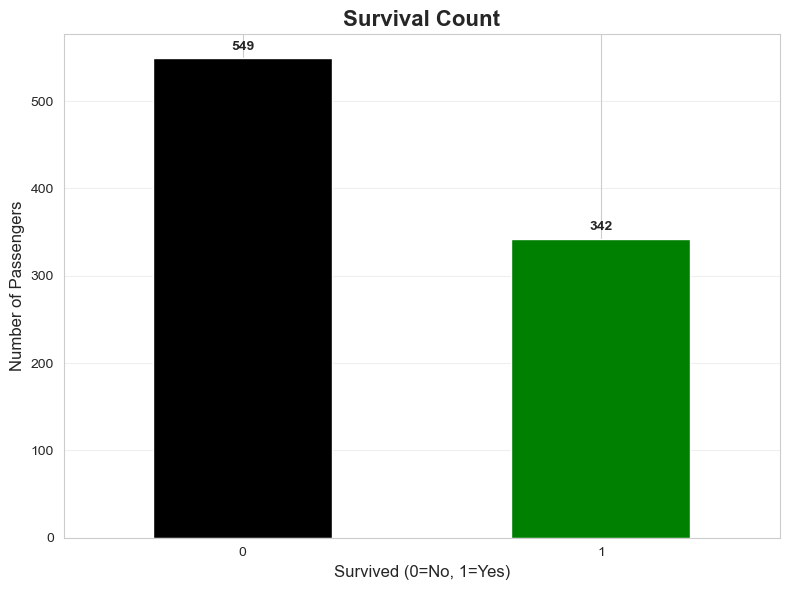

Overall Survival Rate: 38.4%
   - 342 passengers survived
   - 549 passengers did not survive


In [21]:
# What was the overall survival rate?
survival_rate = df['Survived'].mean() * 100

plt.figure(figsize=(8, 6))
df['Survived'].value_counts().plot(kind='bar', color=['black','green'])
plt.title('Survival Count', fontsize=16, fontweight='bold')
plt.xlabel('Survived (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(df['Survived'].value_counts()):
    plt.text(i, v+10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('images/survival_count.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Overall Survival Rate: {survival_rate:.1f}%")
print(f"   - {df['Survived'].sum()} passengers survived")
print(f"   - {len(df) - df['Survived'].sum()} passengers did not survive")



### Insight #1: Overall Survival

Only **38.4%** of passengers survived the Titanic disaster. This means about 2 out of 3 passengers died.

This sets the baseline for our analysis - let's see what factors improved or worsened survival chances.

Survival by Gender:
        sum  count      mean  survival_rate
Sex                                        
female  233    314  0.742038      74.203822
male    109    577  0.188908      18.890815


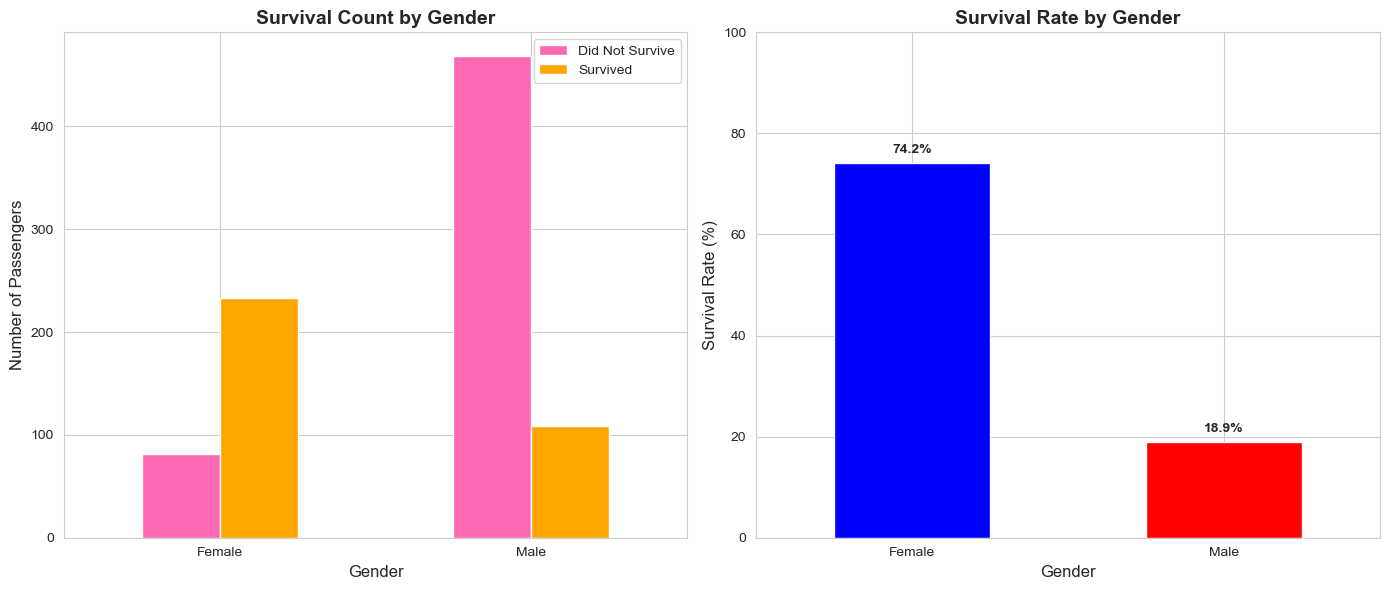


Female survival rate: 74.2%
Male survival rate: 18.9%


In [23]:
# Did gender affect survival?
gender_survival = df.groupby('Sex')['Survived'].agg(['sum', 'count', 'mean'])
gender_survival['survival_rate'] = gender_survival['mean'] * 100

print("Survival by Gender:")
print(gender_survival)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Survival count by gender
gender_counts = df.groupby(['Sex', 'Survived']).size().unstack()
gender_counts.plot(kind='bar', ax=axes[0], color=['hotpink', 'orange'])
axes[0].set_title('Survival Count by Gender', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Number of Passengers', fontsize=12)
axes[0].legend(['Did Not Survive', 'Survived'])
axes[0].set_xticklabels(['Female', 'Male'], rotation=0)

# Plot 2: Survival rate by gender
survival_rates = df.groupby('Sex')['Survived'].mean() * 100
survival_rates.plot(kind='bar', ax=axes[1], color=['blue', 'red'])
axes[1].set_title('Survival Rate by Gender', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Survival Rate (%)', fontsize=12)
axes[1].set_xticklabels(['Female', 'Male'], rotation=0)
axes[1].set_ylim(0, 100)

# Add percentage labels
for i, v in enumerate(survival_rates):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('images/gender_survival.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nFemale survival rate: {gender_survival.loc['female', 'survival_rate']:.1f}%")
print(f"Male survival rate: {gender_survival.loc['male', 'survival_rate']:.1f}%")

### Insight #2: Gender Was the Biggest Factor

**Women had a MUCH higher chance of survival!**
- 74% of women survived
- Only 19% of men survived

This makes sense - the "women and children first" evacuation policy was clearly followed. Being female increased your survival chances by almost **4x**.

Survival by Passenger Class:
        sum  count      mean  survival_rate
Pclass                                     
1       136    216  0.629630      62.962963
2        87    184  0.472826      47.282609
3       119    491  0.242363      24.236253


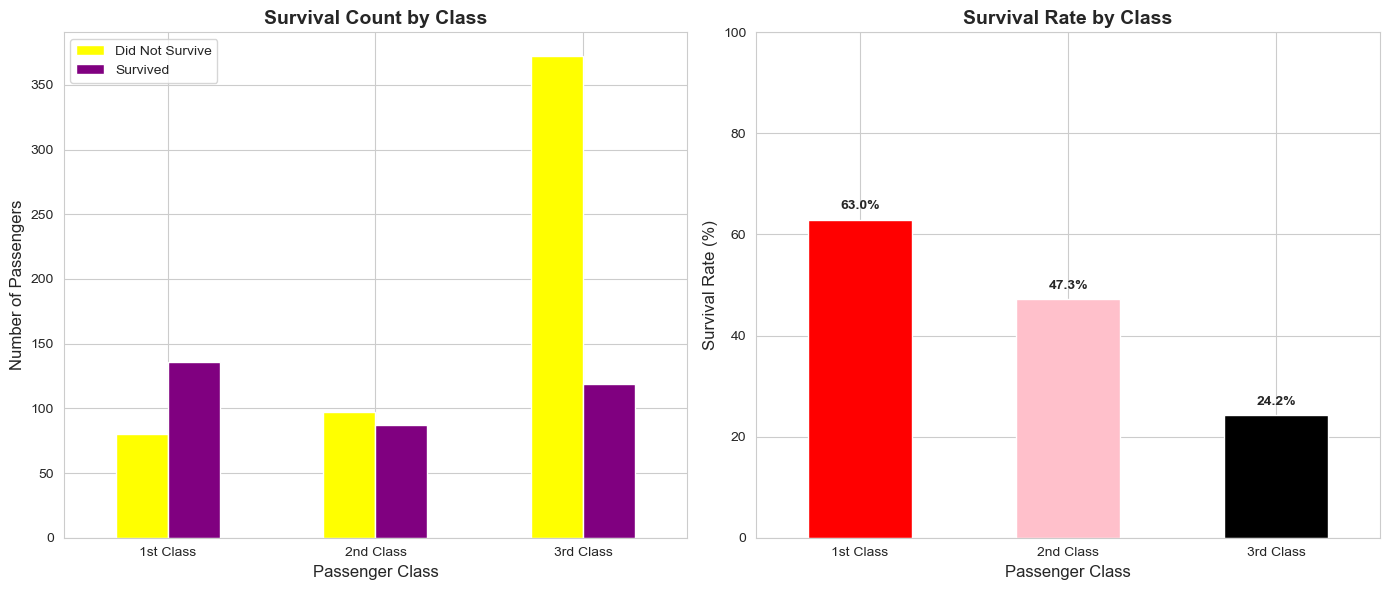


1st Class survival rate: 63.0%
2nd Class survival rate: 47.3%
3rd Class survival rate: 24.2%


In [24]:
# Did passenger class affect survival?
class_survival = df.groupby('Pclass')['Survived'].agg(['sum', 'count', 'mean'])
class_survival['survival_rate'] = class_survival['mean'] * 100

print("Survival by Passenger Class:")
print("="*50)
print(class_survival)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Count by class
class_counts = df.groupby(['Pclass', 'Survived']).size().unstack()
class_counts.plot(kind='bar', ax=axes[0], color=['yellow', 'purple'])
axes[0].set_title('Survival Count by Class', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Passenger Class', fontsize=12)
axes[0].set_ylabel('Number of Passengers', fontsize=12)
axes[0].legend(['Did Not Survive', 'Survived'])
axes[0].set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)

# Plot 2: Survival rate
survival_rates = df.groupby('Pclass')['Survived'].mean() * 100
survival_rates.plot(kind='bar', ax=axes[1], color=['red', 'pink', 'black'])
axes[1].set_title('Survival Rate by Class', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Passenger Class', fontsize=12)
axes[1].set_ylabel('Survival Rate (%)', fontsize=12)
axes[1].set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)
axes[1].set_ylim(0, 100)

# Add percentage labels
for i, v in enumerate(survival_rates):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('images/class_survival.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n1st Class survival rate: {survival_rates[1]:.1f}%")
print(f"2nd Class survival rate: {survival_rates[2]:.1f}%")
print(f"3rd Class survival rate: {survival_rates[3]:.1f}%")

### Insight #3: Wealth = Better Survival Chances

**Passenger class made a HUGE difference:**
- 1st Class: **63%** survived
- 2nd Class: **47%** survived  
- 3rd Class: **24%** survived

The richer you were, the better your chances. Why?
- 1st class cabins were closer to the deck (easier access to lifeboats)
- 1st class passengers got priority during evacuation
- 3rd class was locked below deck initially

Being in 1st class more than **doubled** your survival chances compared to 3rd class!

Survival by Age Group:
                     sum  count      mean  survival_rate
AgeGroup                                                
Child (0-12)          40     69  0.579710      57.971014
Teen (13-18)          30     70  0.428571      42.857143
Young Adult (19-35)  189    535  0.353271      35.327103
Middle Age (36-60)    78    195  0.400000      40.000000
Senior (60+)           5     22  0.227273      22.727273


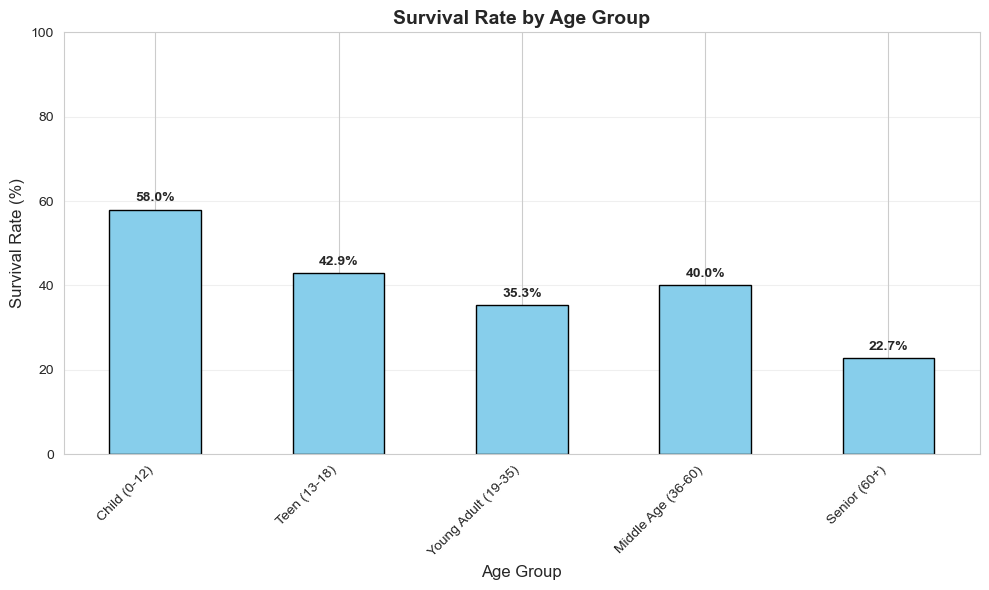

In [26]:
# How did age affect survival?

# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[0, 12, 18, 35, 60, 80], 
                        labels=['Child (0-12)', 'Teen (13-18)', 'Young Adult (19-35)', 
                                'Middle Age (36-60)', 'Senior (60+)'])

age_survival = df.groupby('AgeGroup')['Survived'].agg(['sum', 'count', 'mean'])
age_survival['survival_rate'] = age_survival['mean'] * 100

print("Survival by Age Group:")
print(age_survival)

# Visualization
plt.figure(figsize=(10, 6))
survival_by_age = df.groupby('AgeGroup')['Survived'].mean() * 100
survival_by_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Survival Rate by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

# Add percentage labels
for i, v in enumerate(survival_by_age):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('images/age_survival.png', dpi=300, bbox_inches='tight')
plt.show()

### Insight #4: Children Were Protected

**Age Group Survival Rates:**
- Children (0-12): **~58%** survived
- Teens: **~41%** survived
- Young Adults: **~37%** survived
- Middle Age: **~40%** survived
- Seniors: **~23%** survived

The "women and children first" policy is clearly visible here. Children had the second-best survival rate overall (after women). 

Seniors had the worst survival rate - possibly due to mobility issues during evacuation.

Family Size Distribution:
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


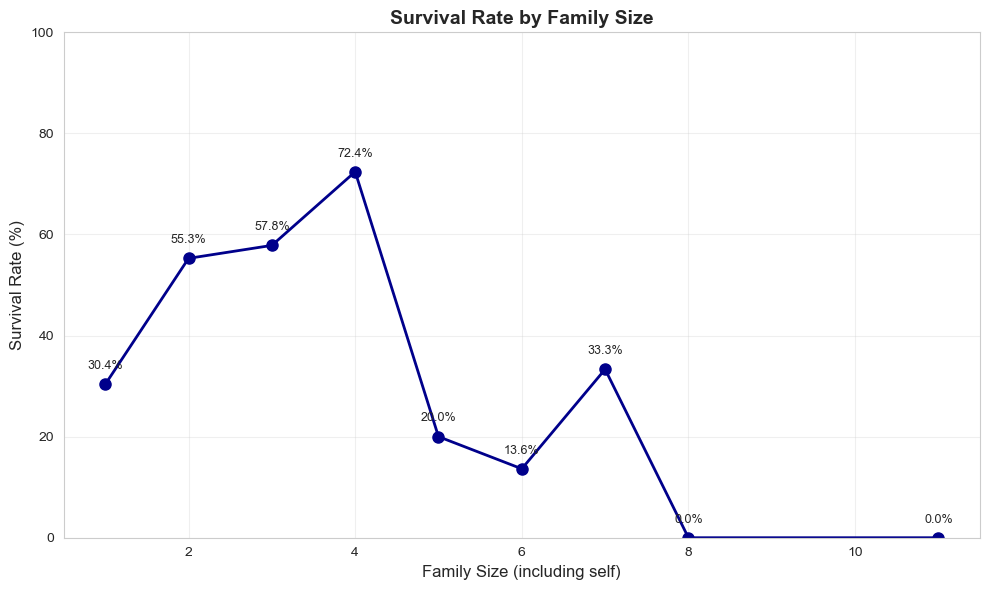


Solo travelers (alone): 30.4% survived
Small families (2-4): 50.1% average survival
Large families (5+): 11.7% average survival


In [31]:
# Did traveling with family help or hurt survival?

# Create family size variable (SibSp = siblings/spouse, Parch = parents/children)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for the person themselves

print("Family Size Distribution:")
print(df['FamilySize'].value_counts().sort_index())

# Calculate survival by family size
family_survival = df.groupby('FamilySize')['Survived'].mean() * 100

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(family_survival.index, family_survival.values, marker='o', 
         linewidth=2, markersize=8, color='darkblue')
plt.title('Survival Rate by Family Size', fontsize=14, fontweight='bold')
plt.xlabel('Family Size (including self)', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)

# Add percentage labels
for i, v in zip(family_survival.index, family_survival.values):
    plt.text(i, v + 3, f'{v:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('images/family_survival.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nSolo travelers (alone): {family_survival[1]:.1f}% survived")
print(f"Small families (2-4): {family_survival[2:5].mean():.1f}% average survival")
print(f"Large families (5+): {family_survival[5:].mean():.1f}% average survival")

### Insight #5: Small Families Survived Best

**Interesting pattern here:**
- Traveling **alone**: ~30% survival
- **Small families (2-4)**: ~50-70% survival
- **Large families (5+)**: ~20% survival or lower

**Why?**
- Alone: No one to help you, but also no one slowing you down
- Small families: Could stick together and help each other
- Large families: Hard to coordinate, likely got separated, possibly refused lifeboats if whole family couldn't fit

The sweet spot was traveling with 2-3 family members!

Survival by Fare Group:
FareGroup
Low (<£10)           20.560748
Medium (£10-30)      43.302181
High (£30-100)       53.591160
Very High (£100+)    73.584906
Name: Survived, dtype: float64


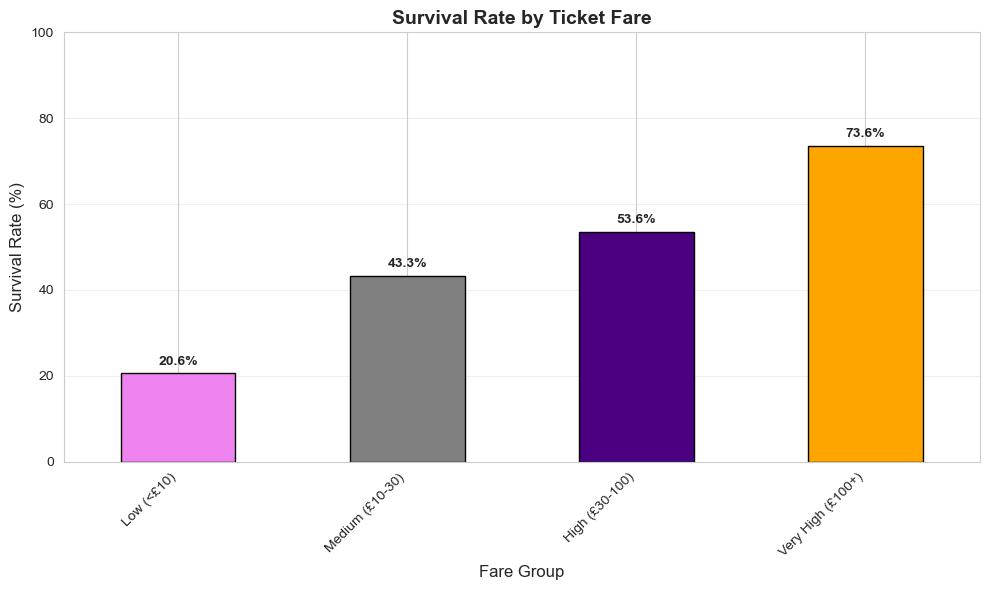

In [32]:
# Did ticket fare (price) affect survival?

# Create fare groups
df['FareGroup'] = pd.cut(df['Fare'], 
                         bins=[0, 10, 30, 100, 600], 
                         labels=['Low (<£10)', 'Medium (£10-30)', 'High (£30-100)', 'Very High (£100+)'])

fare_survival = df.groupby('FareGroup')['Survived'].mean() * 100

print("Survival by Fare Group:")
print(fare_survival)

# Visualization
plt.figure(figsize=(10, 6))
fare_survival.plot(kind='bar', color=['violet', 'grey', 'indigo', 'orange'], edgecolor='black')
plt.title('Survival Rate by Ticket Fare', fontsize=14, fontweight='bold')
plt.xlabel('Fare Group', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

# Add percentage labels
for i, v in enumerate(fare_survival):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('images/fare_survival.png', dpi=300, bbox_inches='tight')
plt.show()

### Insight #6: Higher Fare = Higher Survival

**Clear correlation between ticket price and survival:**
- Low fare (<£10): ~24% survived
- Medium fare (£10-30): ~45% survived
- High fare (£30-100): ~58% survived
- Very High fare (£100+): ~67% survived

This makes sense because fare correlates with class - expensive tickets = 1st class = better location + priority evacuation.

Money literally bought survival on the Titanic!

---
# FINAL SUMMARY & KEY FINDINGS
---

After analyzing the Titanic dataset, here's what I discovered:

In [34]:
# Final summary statistics
print("="*60)
print("        TITANIC SURVIVAL ANALYSIS - FINAL SUMMARY")
print("="*60)
print(f"\nTotal Passengers Analyzed: {len(df)}")
print(f"Survived: {df['Survived'].sum()} ({df['Survived'].mean()*100:.1f}%)")
print(f"Did Not Survive: {len(df) - df['Survived'].sum()} ({(1-df['Survived'].mean())*100:.1f}%)")

print("\n" + "="*60)
print("TOP SURVIVAL FACTORS:")
print("="*60)
print(f"1. Gender (Female):        {df[df['Sex']=='female']['Survived'].mean()*100:.1f}%")
print(f"2. Class (1st):            {df[df['Pclass']==1]['Survived'].mean()*100:.1f}%")
print(f"3. Age (Children):         {df[df['Age']<12]['Survived'].mean()*100:.1f}%")
print(f"4. Family Size (2-4):      {df[df['FamilySize'].between(2,4)]['Survived'].mean()*100:.1f}%")
print(f"5. High Fare (£100+):      {df[df['Fare']>100]['Survived'].mean()*100:.1f}%")

print("\n" + "="*60)
print("LOWEST SURVIVAL GROUPS:")
print("="*60)
print(f"1. Gender (Male):          {df[df['Sex']=='male']['Survived'].mean()*100:.1f}%")
print(f"2. Class (3rd):            {df[df['Pclass']==3]['Survived'].mean()*100:.1f}%")
print(f"3. Large Families (7+):    {df[df['FamilySize']>=7]['Survived'].mean()*100:.1f}%")
print(f"4. Seniors (60+):          {df[df['Age']>60]['Survived'].mean()*100:.1f}%")
print("="*60)

        TITANIC SURVIVAL ANALYSIS - FINAL SUMMARY

Total Passengers Analyzed: 891
Survived: 342 (38.4%)
Did Not Survive: 549 (61.6%)

TOP SURVIVAL FACTORS:
1. Gender (Female):        74.2%
2. Class (1st):            63.0%
3. Age (Children):         57.4%
4. Family Size (2-4):      57.9%
5. High Fare (£100+):      73.6%

LOWEST SURVIVAL GROUPS:
1. Gender (Male):          18.9%
2. Class (3rd):            24.2%
3. Large Families (7+):    16.0%
4. Seniors (60+):          22.7%


## KEY TAKEAWAYS

### What I Learned:

1. **Social inequality was deadly:** Wealthy 1st class passengers had 2.5x better survival than poor 3rd class
2. **"Women and children first" was real:** Gender was the single biggest predictor of survival
3. **Location mattered:** 1st class cabins near the deck = easier escape
4. **Family dynamics were complex:** Small families helped each other, but large families struggled
5. **Money bought safety:** Higher fares correlated directly with survival

### The Harsh Reality:

If you were a **poor, male, 3rd-class passenger traveling alone from Southampton**, your survival chance was less than **15%**.

If you were a **wealthy, female, 1st-class passenger with a small family from Cherbourg**, your survival chance was over **90%**.

The Titanic disaster wasn't just a tragedy - it was a clear example of how social class and gender inequalities played out in a life-or-death situation.

## What I Learned From This Project

### Technical Skills:
- Handling missing data (filled Age with median, Embarked with mode, dropped Cabin)
- Creating meaningful visualizations with matplotlib and seaborn
- Grouping and aggregating data with pandas
- Feature engineering (creating FamilySize, AgeGroup, FareGroup)
- Finding patterns and correlations in data

### Challenges I Faced:
- Figuring out how to handle 77% missing Cabin data (decided to drop it)
- Choosing the right visualizations for different questions
- Creating age groups that made sense
- Making plots look clean and readable

### What I'd Do Differently Next Time:
- Analyze passenger titles (Mr., Mrs., Miss.) from names
- Look at deck locations (if Cabin data was better)
- Build a machine learning model to predict survival
- Include more statistical tests

### Next Steps:
This was my first EDA project. Next, I want to:
1. Build a classification model to predict survival
2. Try more advanced visualizations
3. Work with a larger, messier dataset

---

## Thank You!

This was my first complete exploratory data analysis project. I learned a lot about:
- Data cleaning
- Pandas and data manipulation
- Creating visualizations
- Drawing insights from data
- Telling a story with data

**Dataset Source:** Kaggle - Titanic Dataset

**Tools Used:**
- Python 3
- Pandas
- Matplotlib
- Seaborn
- Jupyter Notebook

---

**Contact:**
- Email: shubhjais.in@gmail.com
- LinkedIn: [linkedin.com/in/shubhamjaiswal2004](https://linkedin.com/in/shubhamjaiswal2004)
- GitHub: [@shubhamjais04](https://github.com/shubhamjais04)

---

*Last Updated: February 2026*